In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

/home/bacox/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/bacox/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


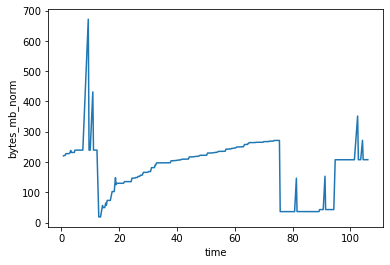

AgeNet


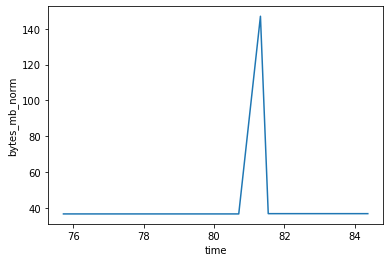

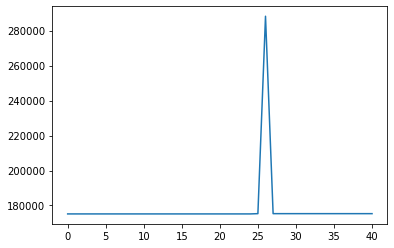

FaceNet


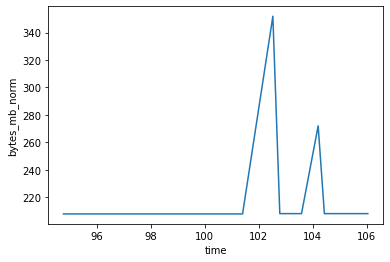

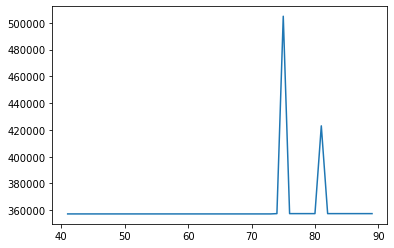

GenderNet


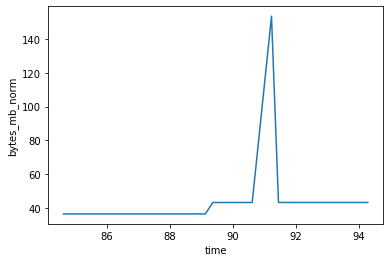

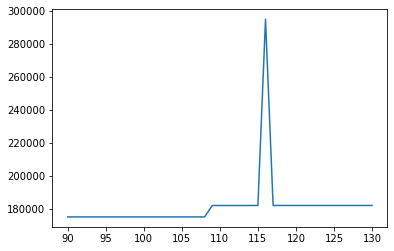

Salient Object Subitizing


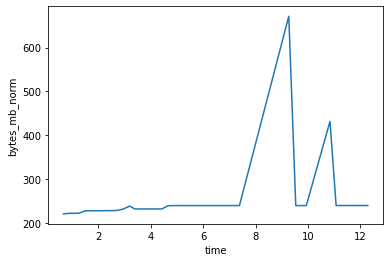

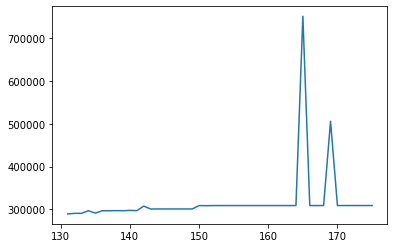

Salient Object Subitizing_google


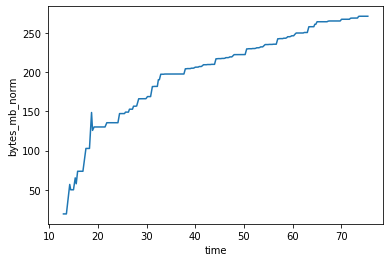

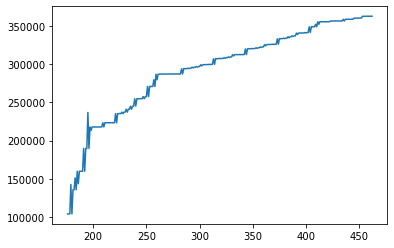

In [34]:
# alloc = pd.read_csv('./cmake-build-debug/allocations.csv')
# # alloc['bytes_mb'] = alloc['bytes'] / (1024**1)
# # alloc[]
# # alloc.iloc[:-3,:]
# alloc = alloc.dropna()
# sns.lineplot(x="time", y="rss_kb", data=alloc)
# plt.show()
# sns.lineplot(x="time", y="shared_kb", data=alloc)
# plt.show()
# sns.lineplot(x="time", y="private_kb", data=alloc)
# plt.show()
# # alloc
# # alloc['networkId'].unique()

raw_data = process_from_filename('../cmake-build-debug/allocation{}.csv'.format("1"))
raw_data['time'] = raw_data['time']/ (1000**3)

sns.lineplot(x="time", y="bytes_mb_norm", data=raw_data)
plt.show()

for network in raw_data.network.unique():
    print(network)
    single_df = raw_data[raw_data.network == network]
    sns.lineplot(x="time", y="bytes_mb_norm", data=single_df)
    plt.show()
    single_df['rss_kb'].plot()
    plt.show()


# alloc[alloc.network == 'Salient Object Subitizing']['bytes'].plot()
# plt.show()

In [5]:
# # Process run
# # alloc.groupby(['networkId', 'layerId','taskType']).min().reset_index()
# norm_df_list = []
# for netId in alloc.networkId.unique():
# #     Reset by min bytes
#     tmp_df = alloc[alloc.networkId == netId];
#     min_bytes = tmp_df.bytes.min()
#     tmp_df['bytes_norm'] = tmp_df.bytes - min_bytes
#     norm_df_list.append(tmp_df)
# #     alloc[alloc.networkId == netId]['bytes_norm'] = tmp_df.bytes - min_bytes
# #     print(tmp_df.bytes.min())
# #     print(netId)
# norm_df = pd.concat(norm_df_list)

conv_fc_layers = {
    'AgeNet': {'conv': 12, 'fc':8},
    'GenderNet': {'conv': 12, 'fc':8},
    'FaceNet': {'conv': 17, 'fc':8},
    'Salient Object Subitizing': {'conv': 16, 'fc':6},
    'Salient Object Subitizing_google': {'conv': 10, 'fc':142}
}

def process_run(df):
    df = df.dropna()
    norm_df_list = []
    for netId in df.networkId.unique():
    #     Reset by min bytes
        tmp_df = df[df.networkId == netId];
        min_bytes = tmp_df.rss_kb.min()
        tmp_df['bytes_norm'] = tmp_df.rss_kb - min_bytes
        tmp_df['bytes_mb_norm'] = tmp_df['bytes_norm']/1024
        norm_df_list.append(tmp_df)
    #     alloc[alloc.networkId == netId]['bytes_norm'] = tmp_df.bytes - min_bytes
    #     print(tmp_df.bytes.min())
    #     print(netId)
    norm_df = pd.concat(norm_df_list)
    return norm_df

def get_max_per_layer(norm_df):
    return norm_df.groupby(['network','layerId', 'taskType']).max().reset_index()

def process_from_filename(filename):
    df = pd.read_csv(filename)
    df = process_run(df)
    df = get_max_per_layer(df)
    return df

def setfc_conv(df, network, dictionary):
    df.loc[(df['network']==network) & (df['layerId']< dictionary['conv']), "fc-conv"] = 'conv'
    df.loc[(df['network']==network) & (df['layerId']>= dictionary['conv']), "fc-conv"] = 'fc'
    
def fc_conv(original_df):
    df = original_df
    for network in df.network:
#         print(network)
        dictionary = conv_fc_layers[network]
        df.loc[(df['network']==network) & (df['layerId']< dictionary['conv']), "fc-conv"] = 'conv'
        df.loc[(df['network']==network) & (df['layerId']>= dictionary['conv']), "fc-conv"] = 'fc'
    df = df[df.layerId > -1]
    df = df.groupby(['network', 'fc-conv']).max().reset_index()
    return df

list_of_df = []
list_of_conv_fc = []
for idx in range(1,11):
#     print(idx)
    calc_df = process_from_filename('./allocations{}.csv'.format(idx))
#     print(calc_df)
    conv_fc_df = fc_conv(calc_df)
    list_of_df.append(calc_df)
    list_of_conv_fc.append(conv_fc_df)

# len(list_of_df)
# list_of_df[2]
combined = pd.concat(list_of_df)
combined_fc_conv = pd.concat(list_of_conv_fc)
# calc_df = process_from_filename('./cmake-build-debug/allocations.csv')
# calc_df
# altered = fc_conv(combined)
# altered.groupby(['network', 'fc-conv']).sum().reset_index()

/home/bacox/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/bacox/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


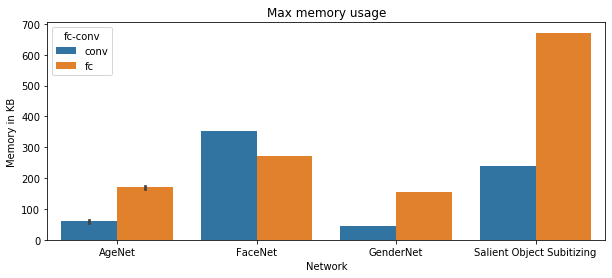

In [6]:
tmp_df = combined_fc_conv.drop(combined_fc_conv[combined_fc_conv.network == 'Salient Object Subitizing_google'].index)
# tmp_df = combined_fc_conv
# (combined_fc_conv['network'] == 'Salient Object Subitizing_google').index

plt.figure(figsize=(10,4))
sns.barplot(x="network", y="bytes_mb_norm", hue="fc-conv", data=tmp_df)
plt.title('Max memory usage')
plt.xlabel('Network')
plt.ylabel('Memory in KB')
plt.savefig('max_mem_conv_fc_exlc.png')
plt.show()

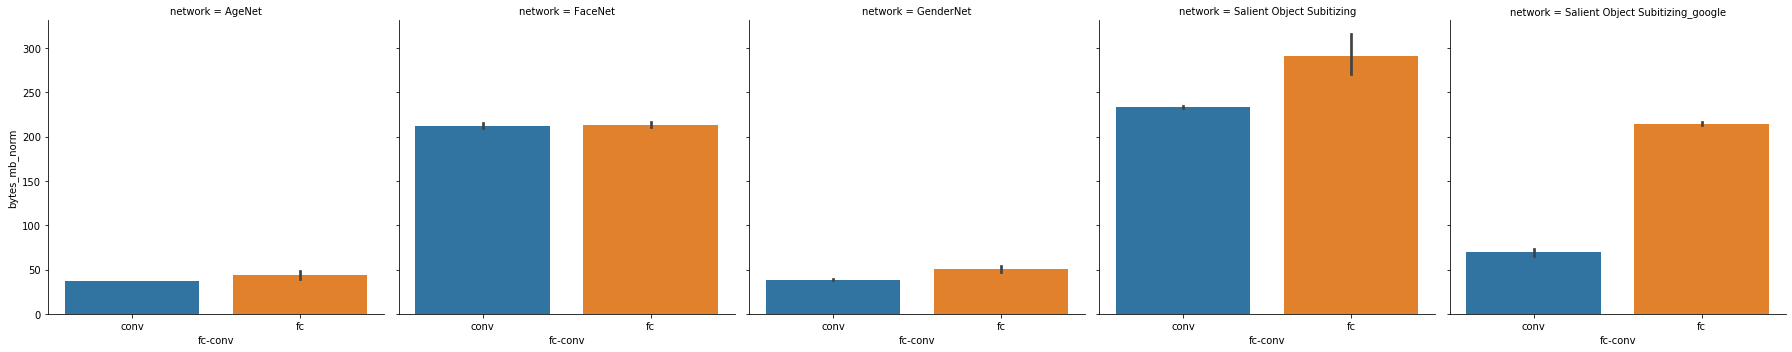

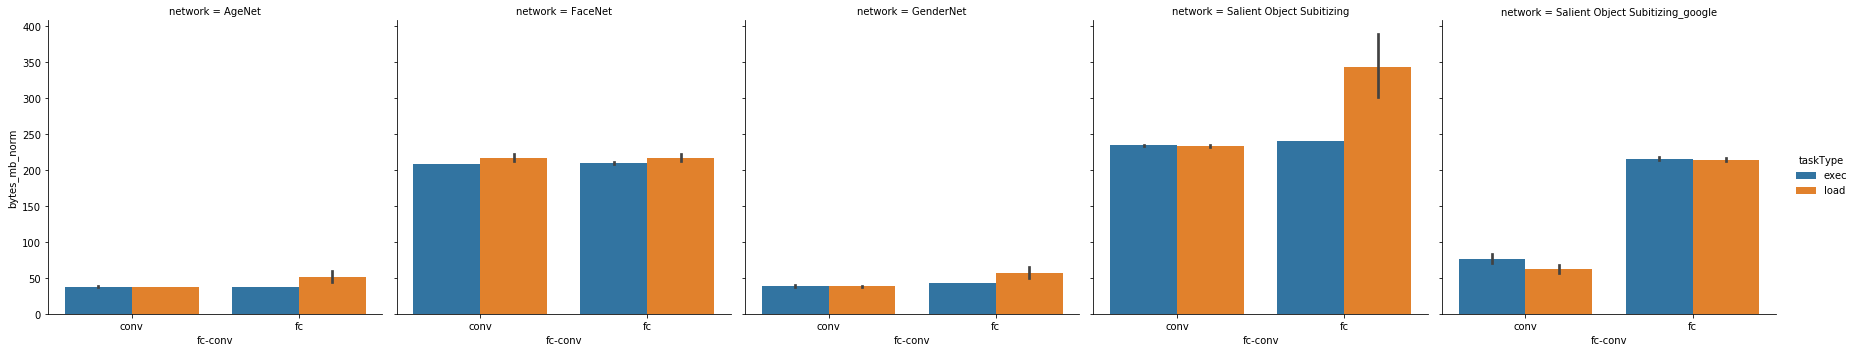

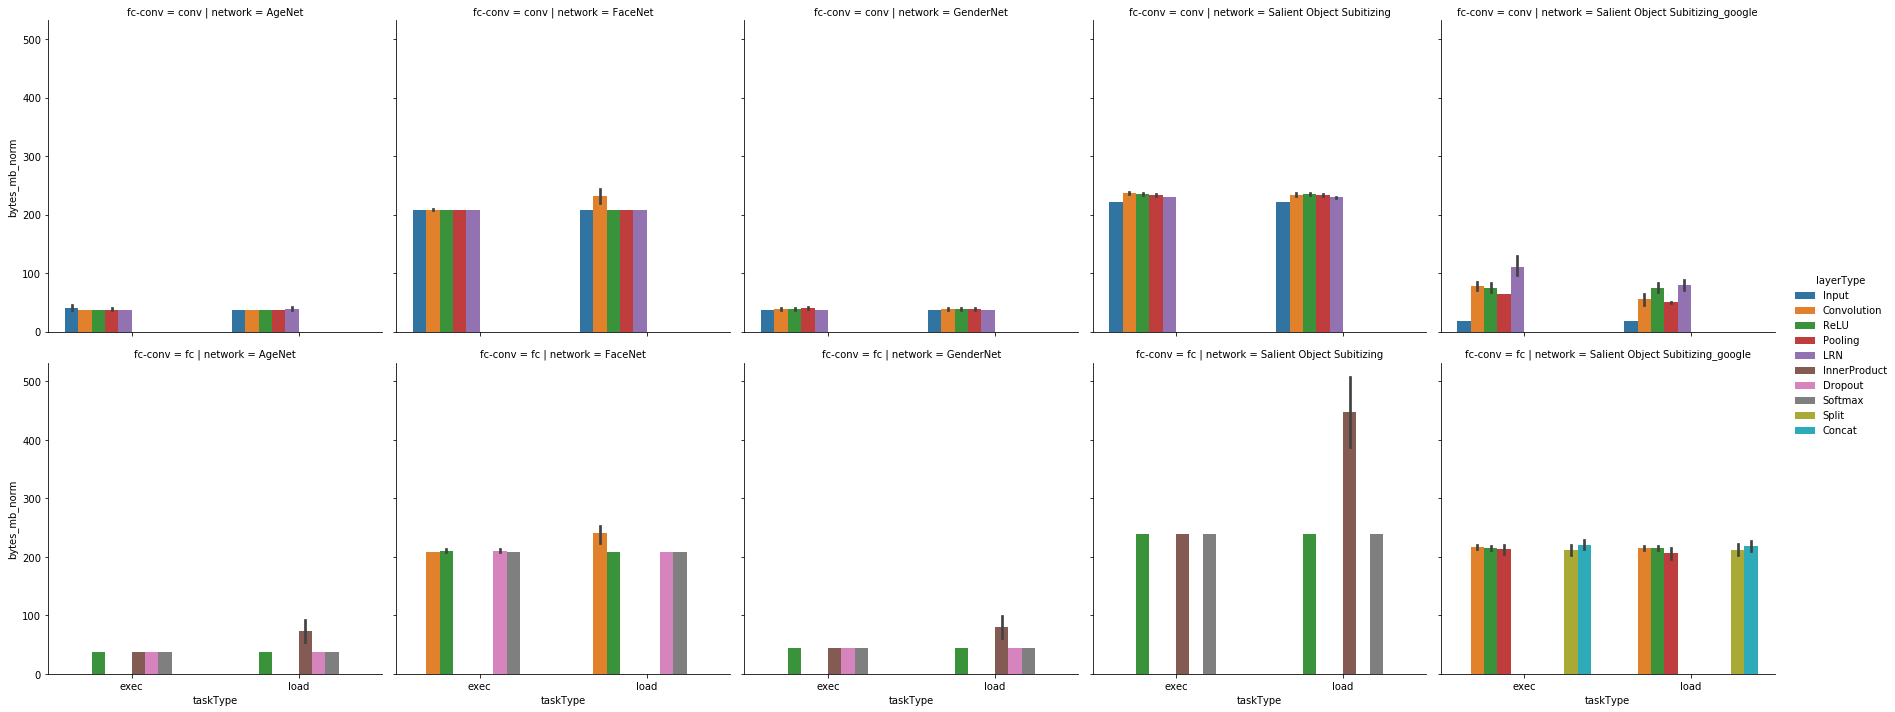

In [56]:
tmp2_df = combined.drop(combined[combined.network == 'Salient Object Subitizing_google'].index)
tmp2_df = combined
tmp2_df = tmp2_df.drop(tmp2_df[tmp2_df.taskType == 'init'].index)

# tmp2_df = combined


# g = sns.FacetGrid(tmp2_df, row='fc-conv', col="network", margin_titles=True)
# g.map(sns.barplot, "taskType", "bytes_mb_norm");
# g = sns.FacetGrid(tmp2_df, col="network", margin_titles=True)
# g.map(sns.barplot, "fc-conv", "bytes_mb_norm", hue="taskType");

sns.catplot("fc-conv", "bytes_mb_norm", col="network", data=tmp2_df, kind="bar")
plt.show()
sns.catplot("fc-conv", "bytes_mb_norm", "taskType", col="network", data=tmp2_df, kind="bar")
plt.show()

sns.catplot("taskType", "bytes_mb_norm", "layerType", row='fc-conv', col="network", data=tmp2_df, kind="bar")
plt.show()
# tmp2_df
# for network in tmp2_df.network.unique():
# #     print(network)
#     sns.barplot(x="fc-conv", y="bytes_mb_norm", hue="taskType", data=tmp2_df[tmp2_df.network == network])
#     plt.show()
#     print(tmp_df[tmp_df.network == network])

# Profiler resolution
Calculate the resolution of profiler.

How fast can be measure the memory usage using the OS:

In [9]:
res_list = []
for idx in range(1,11):
    alloc_i = pd.read_csv('./allocations{}.csv'.format(idx))
    alloc_i = alloc_i.iloc[1:,:]
    tmp_res = (alloc_i.iloc[-1,:].time - alloc_i.iloc[0,:].time) / len(alloc_i)
    res_list.append(tmp_res)

print('Measuring resolution:')
print('Mean: {} ns'.format(np.mean(res_list)))
print('Std : {} ns'.format(np.std(res_list)))
print('Mean: {} us'.format(np.mean(res_list)/1000))

Measuring resolution:
Mean: 97243.1177622577 ns
Std : 5265.401338217604 ns
Mean: 97.2431177622577 us


84.38683915588632

In [285]:
combined['fc-conv'] = 'conv'

def setfc_conv(df, network, dictionary):
    df.loc[(df['network']==network) & (df['layerId']< dictionary['conv']), "fc-conv"] = 'conv'
    df.loc[(df['network']==network) & (df['layerId']>= dictionary['conv']), "fc-conv"] = 'fc'


setfc_conv(combined, 'AgeNet', ageNet_layers)
setfc_conv(combined, 'GenderNet', genderNet_layers)
setfc_conv(combined, 'FaceNet', faceNet_layers)
setfc_conv(combined, 'Salient Object Subitizing', sos_Alex_layers)
setfc_conv(combined, 'Salient Object Subitizing_google', sos_Google_layers)

# ageNet = combined[combined['network'] == 'AgeNet']
# merged = [ ageNet[ageNet[.groupby('taskType').sum().reset_index(),  ageNet.groupby('taskType').max().reset_index()]
# merged_df = pd.concat(merged)
# merged_df
combined.groupby(['network', 'layerId', 'fc-conv']).mean()
# combined

time    rss_kb  \
network                          layerId fc-conv                           
AgeNet                           -1      conv     7.569937e+10  174651.0   
                                  0      conv     7.600155e+10  174651.0   
                                  1      conv     7.640783e+10  174651.0   
                                  2      conv     7.681737e+10  174651.0   
                                  3      conv     7.722935e+10  174651.0   
...                                                        ...       ...   
Salient Object Subitizing_google  138    fc       7.366355e+10  361933.0   
                                  139    fc       7.408665e+10  362047.0   
                                  140    fc       7.449548e+10  362047.0   
                                  141    fc       7.489992e+10  362047.0   
                                  142    fc       7.531944e+10  362047.0   

                                                  shared_kb  private_kb  \
network                          layerId fc-conv                          
AgeNet                           -1      conv       52338.0    122313.0   
                                  0      conv       52338.0    122313.0   
                                  1      conv       52338.0    122313.0   
                                  2      conv       52338.0    122313.0   
                                  3      conv       52338.0    122313.0   
...                                                     ...         ...   
Salient Object Subitizing_google  138    fc         52338.0    309595.0   
                                  139    fc         52338.0    309709.0   
                                  140    fc         52338.0    309709.0   
                                  141    fc         52338.0    309709.0   
                                  142    fc         52338.0    309709.0   

                                                  networkId  taskId  \
network                          layerId fc-conv                      
AgeNet                           -1      conv           2.0   332.0   
                                  0      conv           2.0   333.5   
                                  1      conv           2.0   335.5   
                                  2      conv           2.0   337.5   
                                  3      conv           2.0   339.5   
...                                                     ...     ...   
Salient Object Subitizing_google  138    fc             1.0   322.5   
                                  139    fc             1.0   324.5   
                                  140    fc             1.0   326.5   
                                  141    fc             1.0   328.5   
                                  142    fc             1.0   330.5   

                                                  bytes_norm  bytes_mb_norm  
network                          layerId fc-conv                             
AgeNet                           -1      conv        37484.0      36.605469  
                                  0      conv        37484.0      36.605469  
                                  1      conv        37484.0      36.605469  
                                  2      conv        37484.0      36.605469  
                                  3      conv        37484.0      36.605469  
...                                                      ...            ...  
Salient Object Subitizing_google  138    fc         277836.0     271.324219  
                                  139    fc         277950.0     271.435547  
                                  140    fc         277950.0     271.435547  
                                  141    fc         277950.0     271.435547  
                                  142    fc         277950.0     271.435547  

[234 rows x 8 columns]

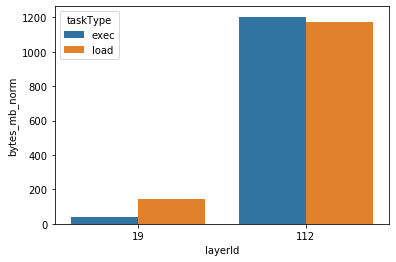

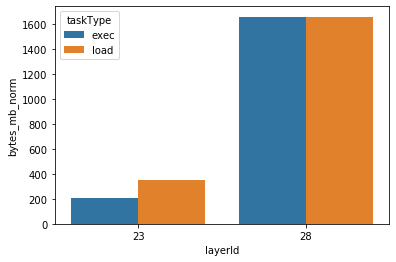

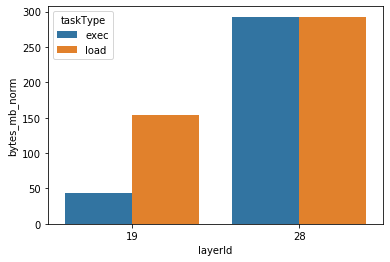

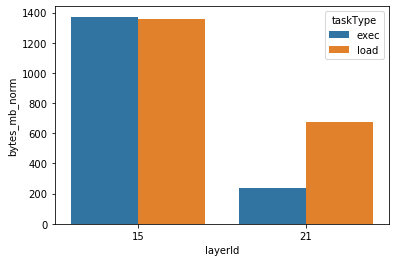

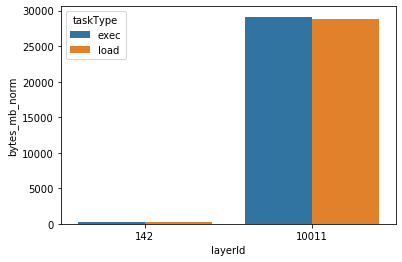

In [279]:
# for networkName in combined.network.unique():
#     plot_data = combined[combined.network == networkName]
#     sns.barplot(x="layerId", y="bytes_mb_norm", hue="taskType", data=plot_data)
#     plt.title(networkName)
#     plt.show()

# Define the number of layers for convolutional and fully connected
ageNet_layers = {'conv': 12, 'fc':8}
genderNet_layers = {'conv': 12, 'fc':8}
faceNet_layers = {'conv': 17, 'fc':8}
sos_Alex_layers = {'conv': 16, 'fc':6}
sos_Google_layers = {'conv': 10, 'fc':142}
    
split_df = combined
split_AgeNet = split_df[split_df.network == 'AgeNet']
split_AgeNet = split_AgeNet[split_AgeNet.layerId >= 0]
ageNet_conv = split_AgeNet[split_AgeNet.layerId < ageNet_layers['fc']]
ageNet_fc = split_AgeNet[split_AgeNet.layerId >= ageNet_layers['fc']]
merged = [ageNet_conv.groupby('taskType').sum().reset_index(), ageNet_fc.groupby('taskType').max().reset_index()]
merged_df = pd.concat(merged)
merged_df
sns.barplot(x="layerId", y="bytes_mb_norm", hue="taskType", data=merged_df)
plt.show()
split_df = list_of_df[0]
split_AgeNet = split_df[split_df.network == 'FaceNet']
split_AgeNet = split_AgeNet[split_AgeNet.layerId >= 0]
ageNet_conv = split_AgeNet[split_AgeNet.layerId < faceNet_layers['fc']]
ageNet_fc = split_AgeNet[split_AgeNet.layerId >= faceNet_layers['fc']]
merged = [ageNet_conv.groupby('taskType').sum().reset_index(), ageNet_fc.groupby('taskType').max().reset_index()]
merged_df = pd.concat(merged)
merged_df
sns.barplot(x="layerId", y="bytes_mb_norm", hue="taskType", data=merged_df)
plt.show()

split_df = list_of_df[0]
split_AgeNet = split_df[split_df.network == 'GenderNet']
split_AgeNet = split_AgeNet[split_AgeNet.layerId >= 0]
ageNet_conv = split_AgeNet[split_AgeNet.layerId < genderNet_layers['fc']]
ageNet_fc = split_AgeNet[split_AgeNet.layerId >= genderNet_layers['fc']]
merged = [ageNet_conv.groupby('taskType').sum().reset_index(), ageNet_fc.groupby('taskType').max().reset_index()]
merged_df = pd.concat(merged)
merged_df
sns.barplot(x="layerId", y="bytes_mb_norm", hue="taskType", data=merged_df)
plt.show()
split_df = list_of_df[0]
split_AgeNet = split_df[split_df.network == 'Salient Object Subitizing']
split_AgeNet = split_AgeNet[split_AgeNet.layerId >= 0]
ageNet_conv = split_AgeNet[split_AgeNet.layerId < sos_Alex_layers['fc']]
ageNet_fc = split_AgeNet[split_AgeNet.layerId >= sos_Alex_layers['fc']]
merged = [ageNet_conv.groupby('taskType').sum().reset_index(), ageNet_fc.groupby('taskType').max().reset_index()]
merged_df = pd.concat(merged)
merged_df
sns.barplot(x="layerId", y="bytes_mb_norm", hue="taskType", data=merged_df)
plt.show()

split_df = list_of_df[0]
split_AgeNet = split_df[split_df.network == 'Salient Object Subitizing_google']
split_AgeNet = split_AgeNet[split_AgeNet.layerId >= 0]
ageNet_conv = split_AgeNet[split_AgeNet.layerId < sos_Google_layers['fc']]
ageNet_fc = split_AgeNet[split_AgeNet.layerId >= sos_Google_layers['fc']]
merged = [ageNet_conv.groupby('taskType').sum().reset_index(), ageNet_fc.groupby('taskType').max().reset_index()]
merged_df = pd.concat(merged)
merged_df
sns.barplot(x="layerId", y="bytes_mb_norm", hue="taskType", data=merged_df)
plt.show()

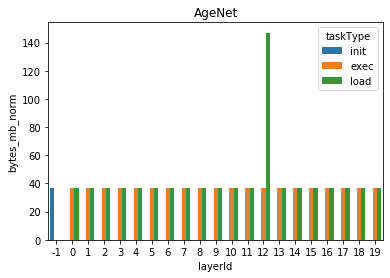

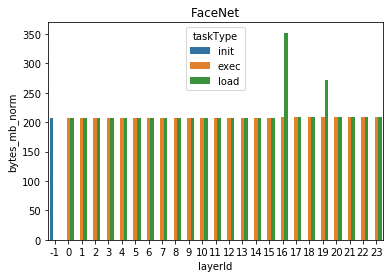

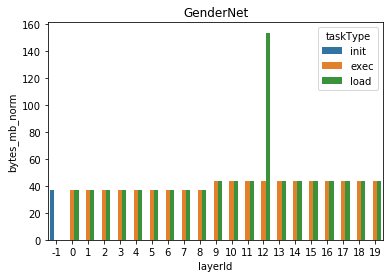

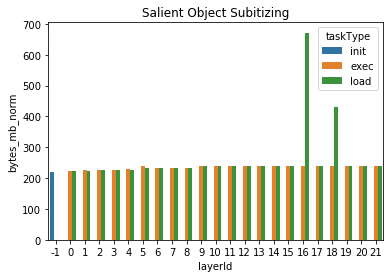

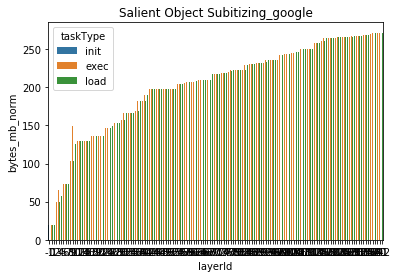

In [210]:
for networkName in calc_df.network.unique():
    plot_data = calc_df[calc_df.network == networkName]
    sns.barplot(x="layerId", y="bytes_mb_norm", hue="taskType", data=plot_data)
    plt.title(networkName)
    plt.show()

In [187]:
max_mem_df = norm_df.groupby(['network','layerId', 'taskType']).max().reset_index()
max_mem_df

,network,layerId,taskType,time,bytes,networkId,taskId,layerType,bytes_norm
0,AgeNet,-1,init,27612621463,174480,2,332,net-init,37484
1,AgeNet,0,exec,27714990868,174480,2,334,Input,37484
2,AgeNet,0,load,27663900544,174480,2,333,Input,37484
3,AgeNet,1,exec,27837330675,174480,2,336,Convolution,37484
4,AgeNet,1,load,27768799669,174480,2,335,Convolution,37484
...,...,...,...,...,...,...,...,...,...
458,Salient Object Subitizing_google,140,load,27187683390,361876,1,326,Convolution,277948
459,Salient Object Subitizing_google,141,exec,27350266914,361876,1,329,ReLU,277948
460,Salient Object Subitizing_google,141,load,27298255295,361876,1,328,ReLU,277948
461,Salient Object Subitizing_google,142,exec,27488284856,361876,1,331,Convolution,277948


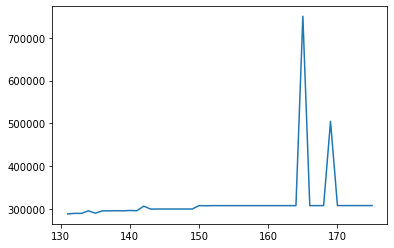

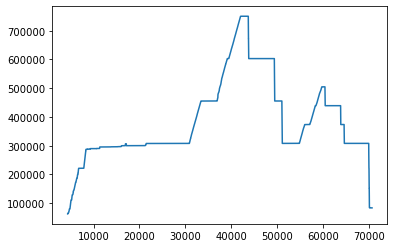

array(['AgeNet', 'FaceNet', 'GenderNet', 'Salient Object Subitizing',
       'Salient Object Subitizing_google'], dtype=object)

In [188]:
max_mem_df[max_mem_df['network'] == 'Salient Object Subitizing']['bytes'].plot()
plt.show()
alloc[alloc.network == 'Salient Object Subitizing']['bytes'].plot()
plt.show()
max_mem_df['network'].unique()

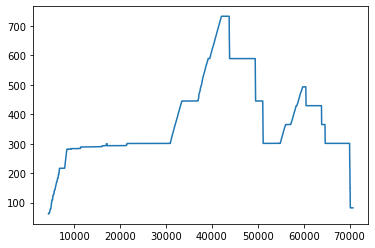

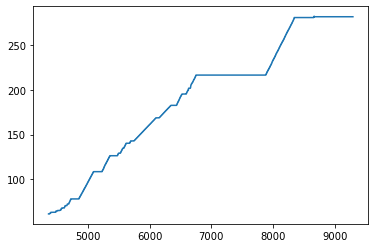

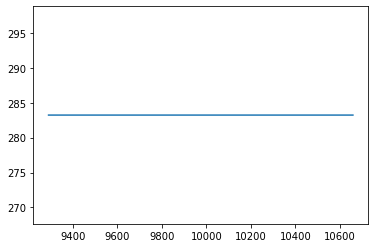

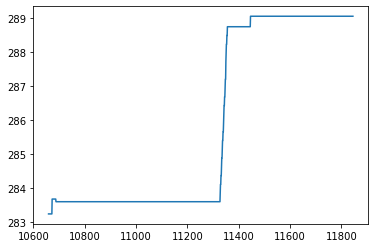

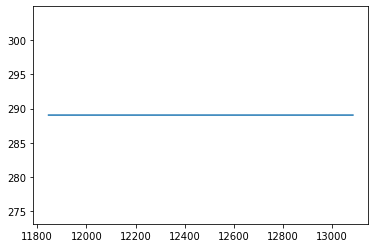

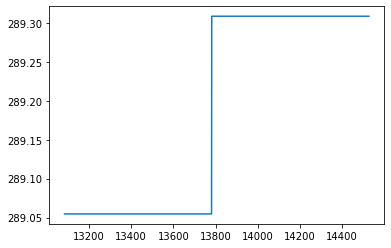

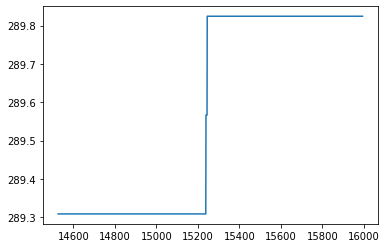

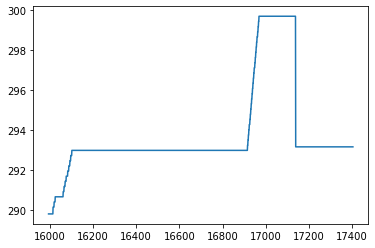

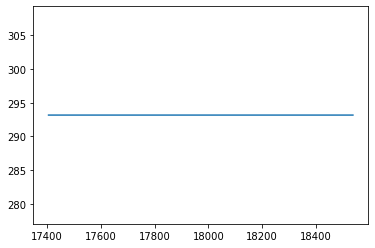

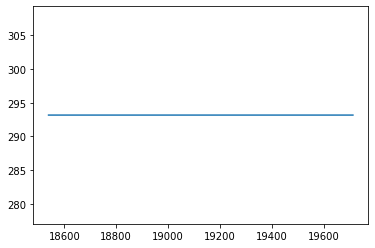

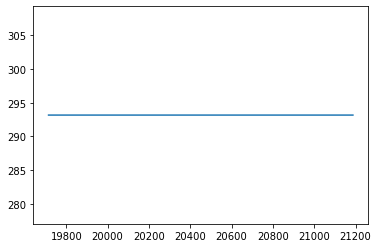

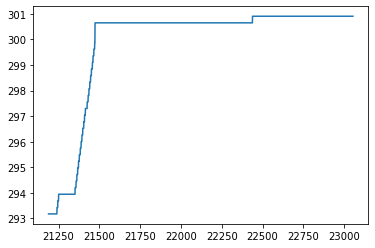

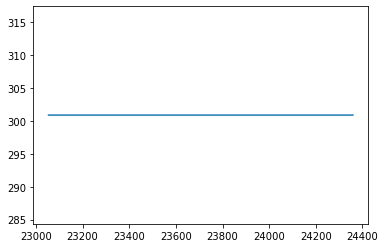

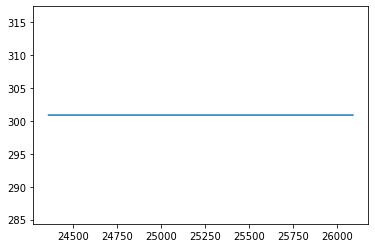

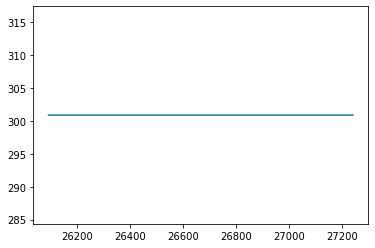

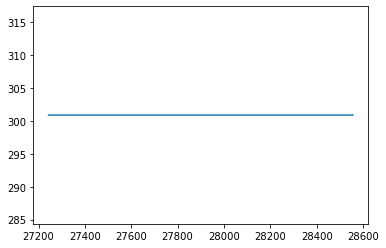

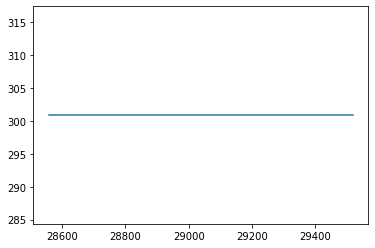

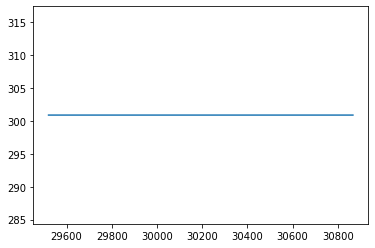

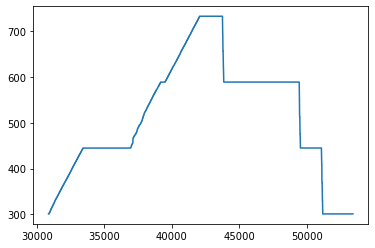

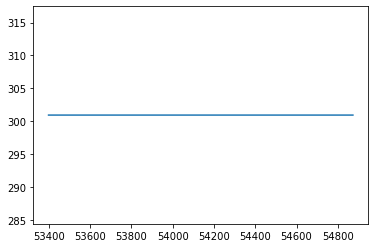

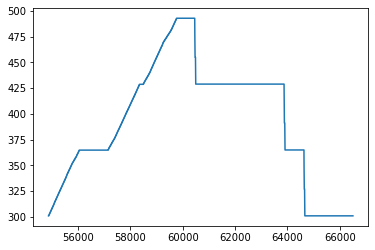

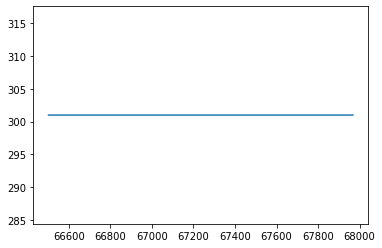

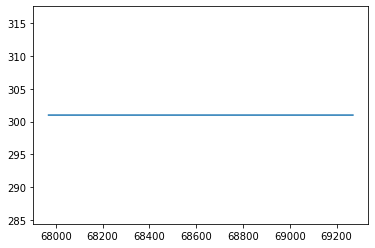

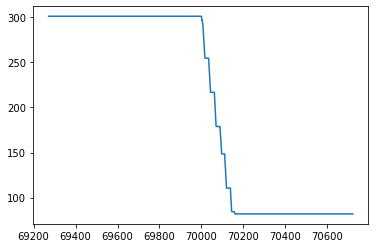

In [182]:
faceNet = alloc[alloc.networkId == 0]
(faceNet['bytes']/1024).plot()
plt.show()
for layerId in faceNet.layerId.unique():
    (faceNet[faceNet.layerId == layerId]['bytes'] / 1024).plot()
    plt.show()

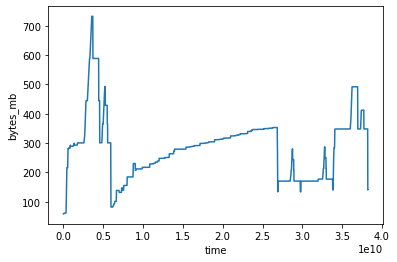

In [128]:
sns.lineplot(x="time", y="bytes_mb", data=alloc)

In [ ]:
network1 = alloc[alloc['networkId'] == 0]
sns.lineplot(x="time", y="bytes_mb", data=network1)


In [ ]:
sns.lineplot(x="time", y="bytes_mb", data=network1[network1['layerId'] == 1])

network1['layerId'].unique()

/home/bacox/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


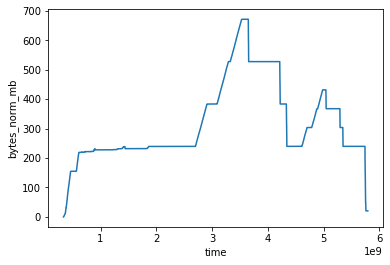

/home/bacox/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


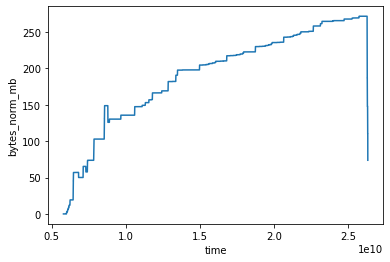

/home/bacox/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


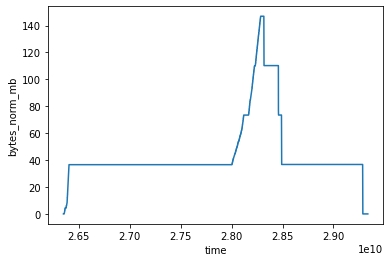

/home/bacox/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


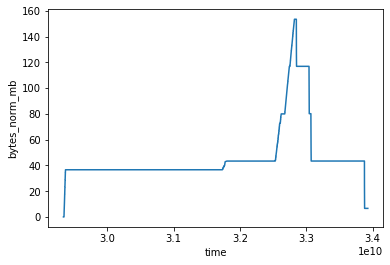

/home/bacox/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


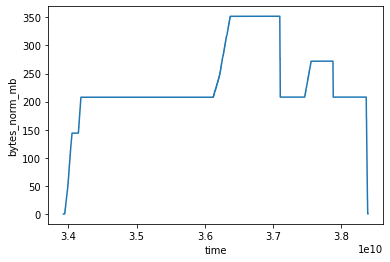

In [104]:
for idx in range(5):
    network_tmp = alloc[alloc['networkId'] == idx]
    network_tmp['bytes_mb'].min()
    network_tmp['bytes_norm_mb'] = network_tmp['bytes_mb'] - network_tmp['bytes_mb'].min()
    sns.lineplot(x="time", y="bytes_norm_mb", data=network_tmp)
    plt.show()

/home/bacox/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


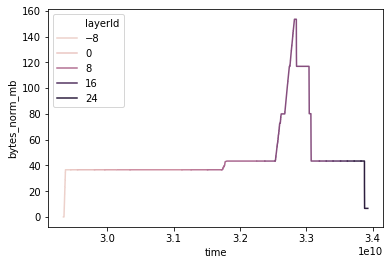

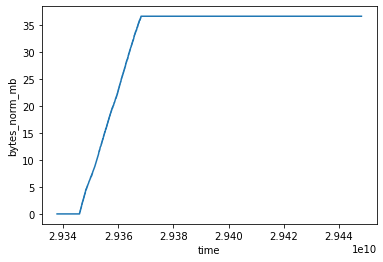

0.0 36.60546875


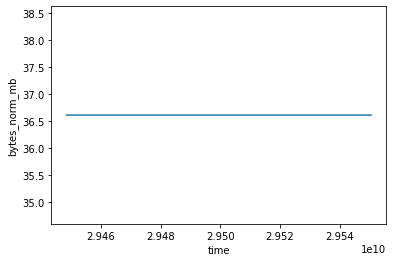

36.60546875 36.60546875


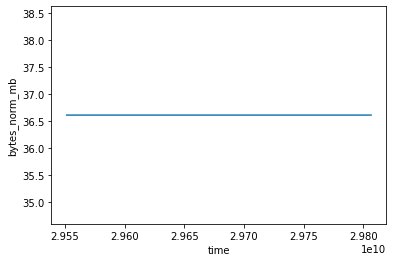

36.60546875 36.60546875


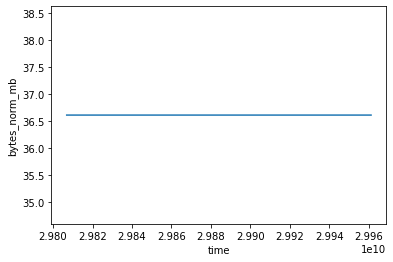

36.60546875 36.60546875


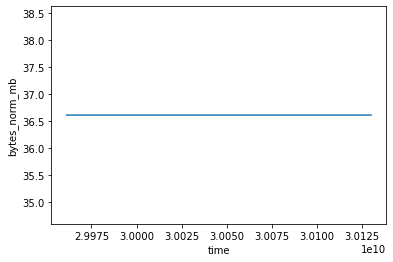

36.60546875 36.60546875


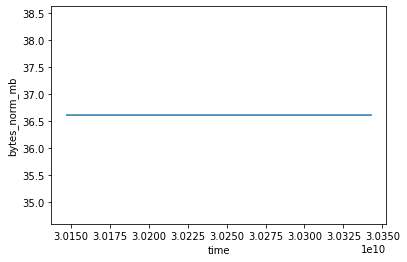

36.60546875 36.60546875


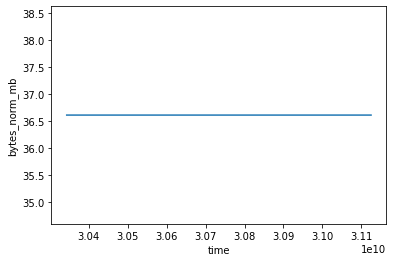

36.60546875 36.60546875


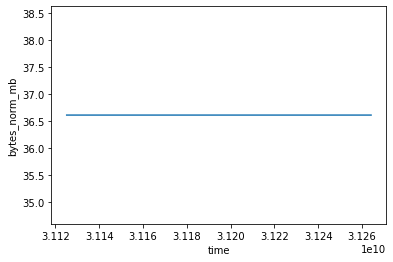

36.60546875 36.60546875


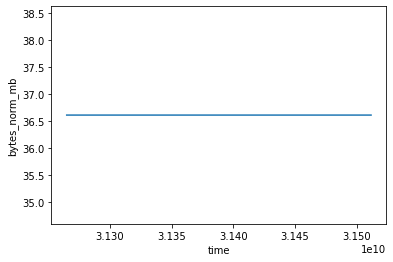

36.60546875 36.60546875


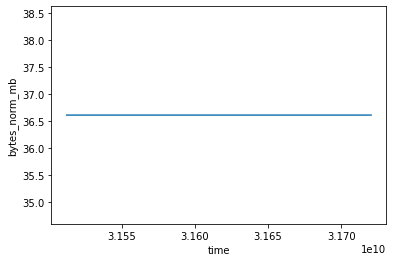

36.60546875 36.60546875


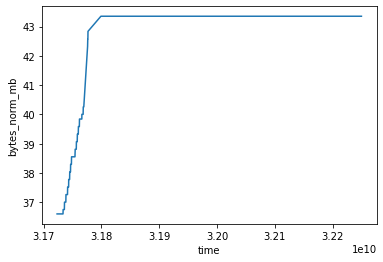

36.60546875 43.3515625


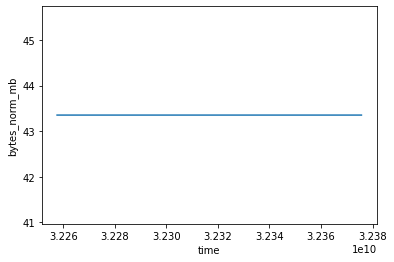

43.3515625 43.3515625


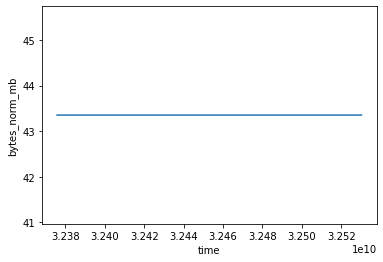

43.3515625 43.3515625


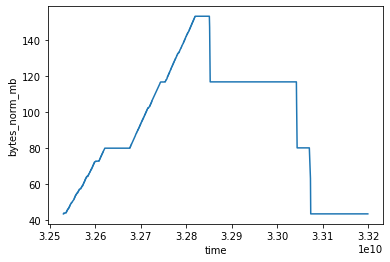

43.3515625 153.4375


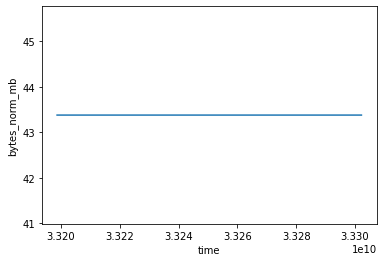

43.37890625 43.37890625


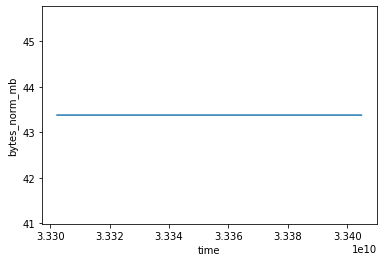

43.37890625 43.37890625


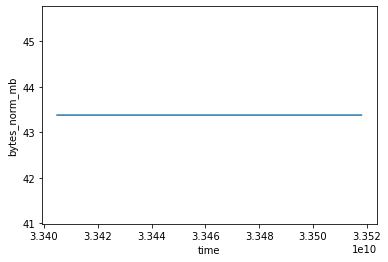

43.37890625 43.37890625


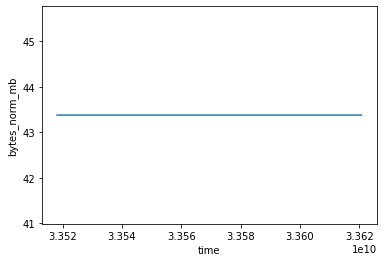

43.37890625 43.37890625


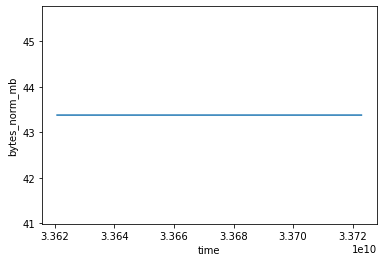

43.37890625 43.37890625


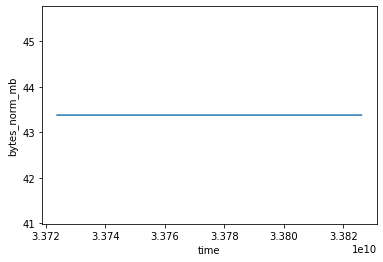

43.37890625 43.37890625


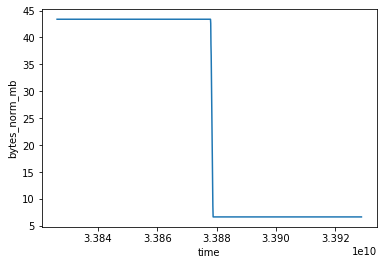

6.625 43.37890625


In [108]:
tmp_net = alloc[alloc['networkId'] == 3]
tmp_net['bytes_norm_mb'] = tmp_net['bytes_mb'] - tmp_net['bytes_mb'].min()
sns.lineplot(x="time", y="bytes_norm_mb", hue='layerId', data=tmp_net)
plt.show()
for layerId in tmp_net.layerId.unique():
    tmp_tmp = tmp_net[tmp_net['layerId']==layerId]
#     tmp_tmp['bytes_norm_mb'] = tmp_tmp['bytes_mb'] - tmp_tmp['bytes_mb'].min()
    sns.lineplot(x="time", y="bytes_norm_mb", data=tmp_tmp)
    plt.show()
#     print(tmp_tmp)
    print(tmp_tmp['bytes_norm_mb'].min(), tmp_tmp['bytes_norm_mb'].max())